In [48]:
# import the compulsory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import ndimage
%matplotlib inline

In [49]:
# get files
train_input = np.load(os.path.abspath(os.path.curdir) + '/things_we_touch/data/input_train.npy')
train_all = np.load(os.path.abspath(os.path.curdir) + '/things_we_touch/data/OG_files/fashion_train.npy')
train_labels = np.load(os.path.abspath(os.path.curdir) + '/things_we_touch/data/labels_train.npy')

(-0.5, 27.5, 27.5, -0.5)

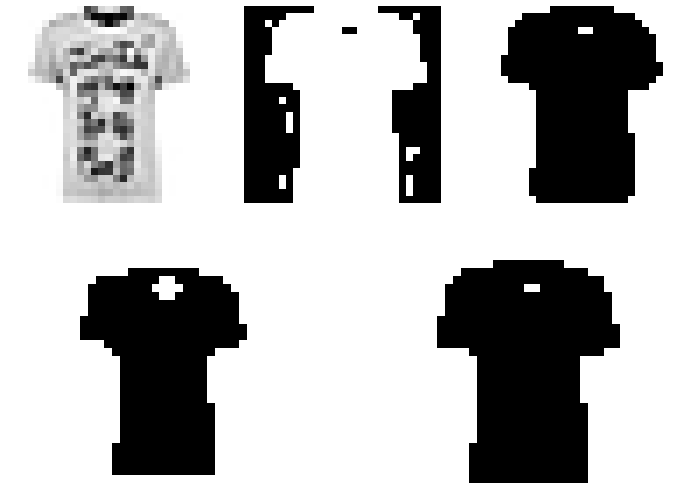

In [64]:
# experiment with some transformation granted we only need shape not colors
picture = train_input[955,:]
picture = picture.reshape(28,28)
bin_picture = np.zeros((28,28), dtype=np.int8)
bin_picture[picture > 0] = 255
open_picture = ndimage.binary_opening(bin_picture)
eroded_picture = ndimage.binary_erosion(bin_picture)
prop_picture = ndimage.binary_propagation(eroded_picture, mask = bin_picture)

# plot them next to each other
plt.figure(figsize = (12,9))
plt.subplot(231)
plt.imshow(picture, cmap = plt.cm.gray_r)
plt.axis('off')
plt.subplot(232)
plt.imshow(bin_picture, cmap = plt.cm.gray_r)
plt.axis('off')
plt.subplot(233)
plt.imshow(open_picture, cmap = plt.cm.gray_r)
plt.axis('off')
plt.subplot(223)
plt.imshow(eroded_picture, cmap = plt.cm.gray_r)
plt.axis('off')
plt.subplot(224)
plt.imshow(prop_picture, cmap = plt.cm.gray_r)
plt.axis('off')





In [68]:
np.unique(dilated_array)

array([0, 1], dtype=int8)

(-0.5, 27.5, 27.5, -0.5)

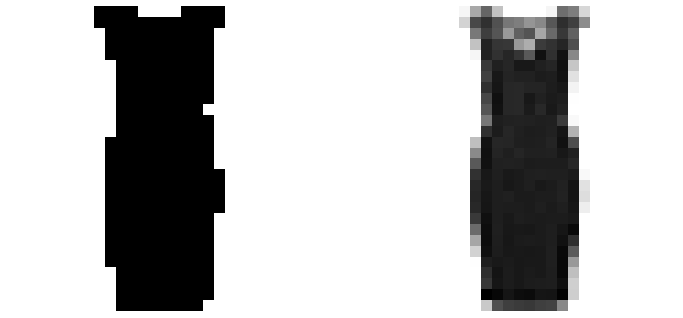

In [74]:
# just for check
element = 560
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.imshow(dilated_array[element,:].reshape(28,28), cmap = plt.cm.gray_r)
plt.axis('off')
plt.subplot(122)
plt.imshow(train_input[element,:].reshape(28,28), cmap = plt.cm.gray_r)
plt.axis('off')

In [66]:
# now the rewrite to normalized dilated form
dilated_array = np.zeros((train_input.shape), dtype = np.int8)
for idx,pict in enumerate(train_input):
    reshaped_pict = pict.reshape(28,28)
    bin_picture = np.zeros((28,28), dtype = np.int8)
    bin_picture[reshaped_pict > 0] = 255
    open_picture = ndimage.binary_opening(bin_picture)
    eroded_picture = ndimage.binary_erosion(bin_picture)
    prop_picture = ndimage.binary_propagation(eroded_picture, mask=bin_picture)
    dilated_array[idx] = prop_picture.reshape(784,)


In [77]:
# save normalized input
np.save('things_we_touch/data/dilated_input.npy', dilated_array)